<a href="https://colab.research.google.com/github/Mihishi/sca-supervised-prediction-model/blob/main/sudden_cardiac_arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Import Libraries***

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ***Step 2: Read Dataset***

In [2]:
sca_df = pd.read_csv('sudden_cardiac_arrest_dataset.csv')
sca_df.shape

(1025, 15)

In [3]:
sca_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,corona_vaccine_name
0,32,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Sinovac
1,35,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pfizer
2,20,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Johnson & Johnson
3,33,1,0,148,203,0,1,161,0,0.0,2,1,3,0,AstraZeneca
4,30,0,0,138,294,1,1,106,0,1.9,1,3,2,0,AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,22,1,1,140,221,0,1,164,1,0.0,2,0,2,1,AstraZeneca
1021,18,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Pfizer
1022,26,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Sinovac
1023,32,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Moderna


# ***Step 3: Dataset Overview***

### ***Step 3.1: Dataset Basic Information***

In [4]:
sca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   cp                   1025 non-null   int64  
 3   trestbps             1025 non-null   int64  
 4   chol                 1025 non-null   int64  
 5   fbs                  1025 non-null   int64  
 6   restecg              1025 non-null   int64  
 7   thalach              1025 non-null   int64  
 8   exang                1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  ca                   1025 non-null   int64  
 12  thal                 1025 non-null   int64  
 13  target               1025 non-null   int64  
 14  corona_vaccine_name  1025 non-null   object 
dtypes: float64(1), int64(13), object(1)
me

In [5]:
sca_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,corona_vaccine_name
0,32,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Sinovac
1,35,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pfizer
2,20,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Johnson & Johnson
3,33,1,0,148,203,0,1,161,0,0.0,2,1,3,0,AstraZeneca
4,30,0,0,138,294,1,1,106,0,1.9,1,3,2,0,AstraZeneca


In [6]:
sca_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'corona_vaccine_name'],
      dtype='object')

In [7]:
print("Number of rows and columns of Training Dataset :", sca_df.shape)

Number of rows and columns of Training Dataset : (1025, 15)


In [8]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in sca_df.columns if feature not in continuous_features]

# Convert the identified features to object data type
sca_df[features_to_convert] = sca_df[features_to_convert].astype('object')

sca_df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


### ***Step 3.2: Summary Statistics for Numerical Variables***

In [9]:
#Check statistical values for fields with numerical datatype
sca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,26.495610,5.165638,18.0,22.0,27.0,31.0,35.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### ***Step 3.3: Summary Statistics for Categorical Variables***

In [10]:
# Get the summary statistics for categorical variables
sca_df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,corona_vaccine_name
count,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2,5
top,1,0,0,1,0,1,0,2,1,AstraZeneca
freq,713,497,872,513,680,482,578,544,526,219


# ***Step 4: EDA***

## *Step 4.1: Univariate Analysis*

### Step 4.1.1 | Numerical Variables Univariate Analysis

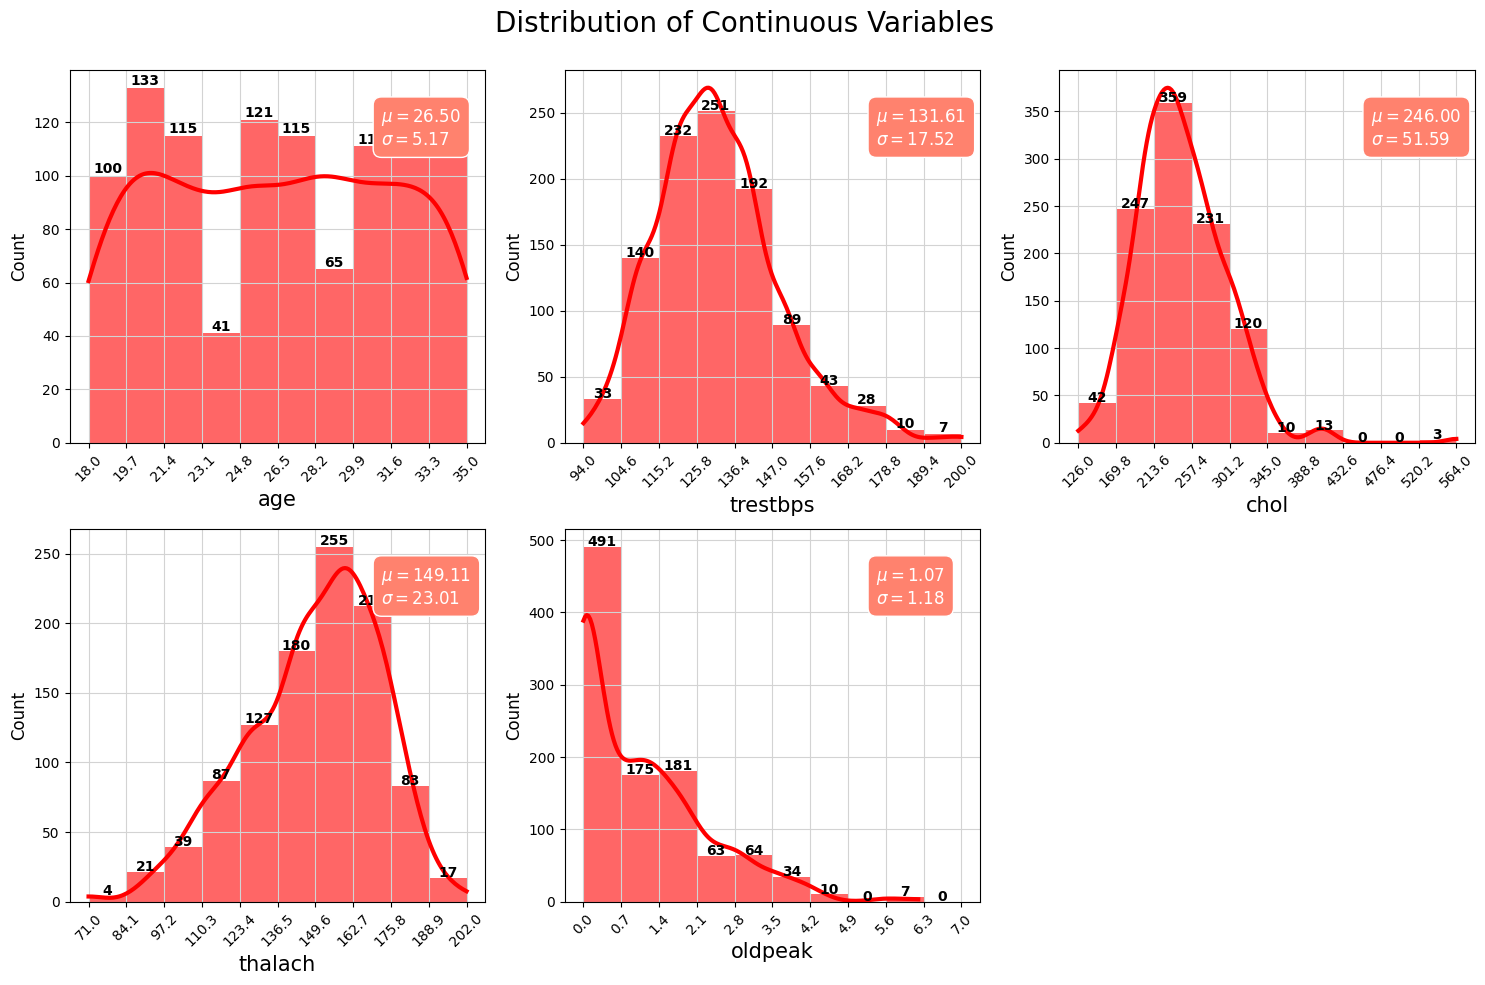

In [11]:
# Filter out continuous features for the univariate analysis
df_continuous = sca_df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### *Step 4.1.2: Categorical Variables Univariate Analysis*

In [12]:
# Filter out categorical features for the univariate analysis
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

In [ ]:
# # Set the resolution of the plotted figures
# plt.rcParams['figure.dpi'] = 200

# # Configure Seaborn plot styles: Set background color and use dark grid
# sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

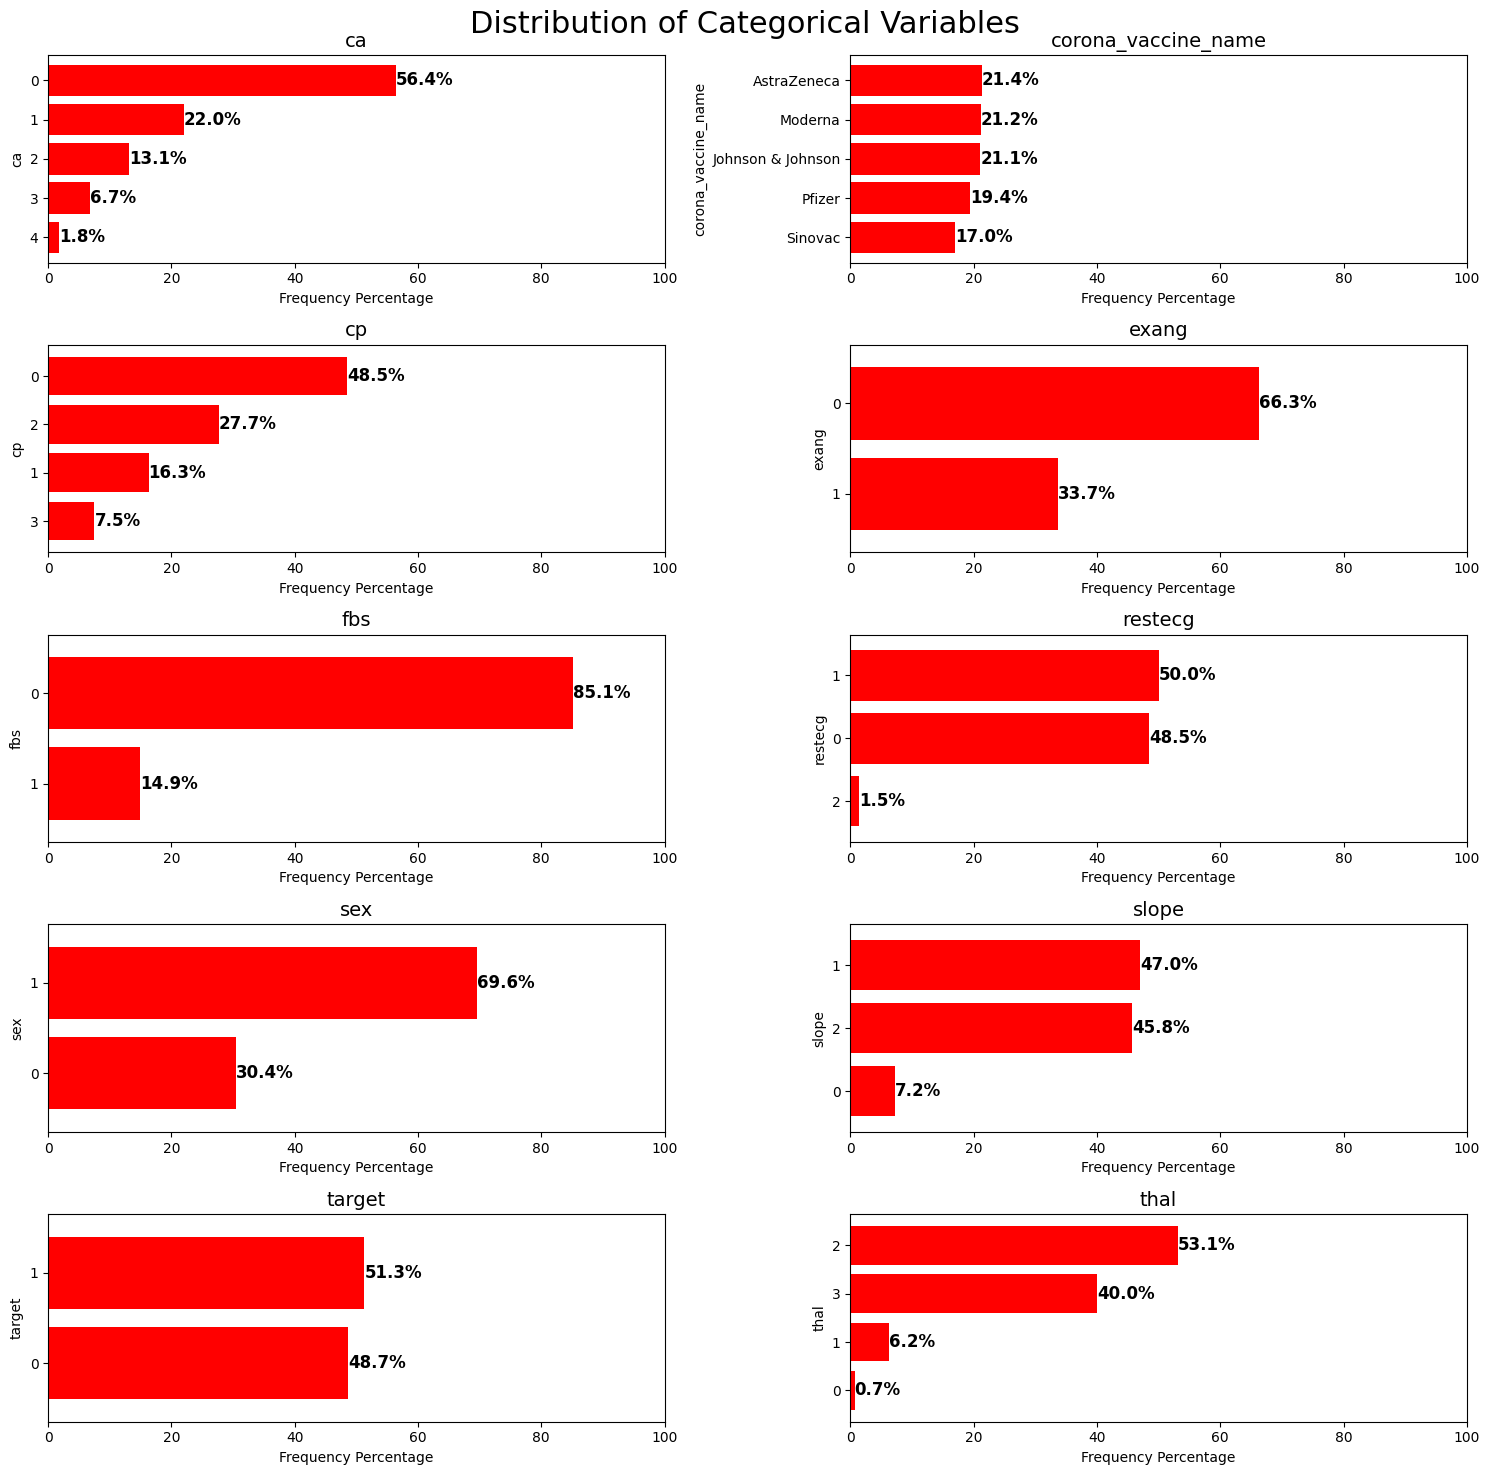

In [13]:
import math
import matplotlib.pyplot as plt

# Identify categorical features
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

# Define subplot grid size based on number of categorical features
n_features = len(categorical_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

# Create subplots
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))

# Ensure ax is a 2D array
ax = np.array(ax).reshape(nrows, ncols)

# Loop through each categorical feature
for i, col in enumerate(categorical_features):
    row = i // ncols
    col_idx = i % ncols

    value_counts = sca_df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%',
                              fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage')
    ax[row, col_idx].set_title(f'{col}', fontsize=14)

# Turn off any unused axes
for i in range(n_features, nrows * ncols):
    row = i // ncols
    col_idx = i % ncols
    ax[row, col_idx].axis('off')

# Final adjustments
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## *Step 4.2: Bivariate Analysis*

*Step 4.2.1: Numerical Features vs Target*

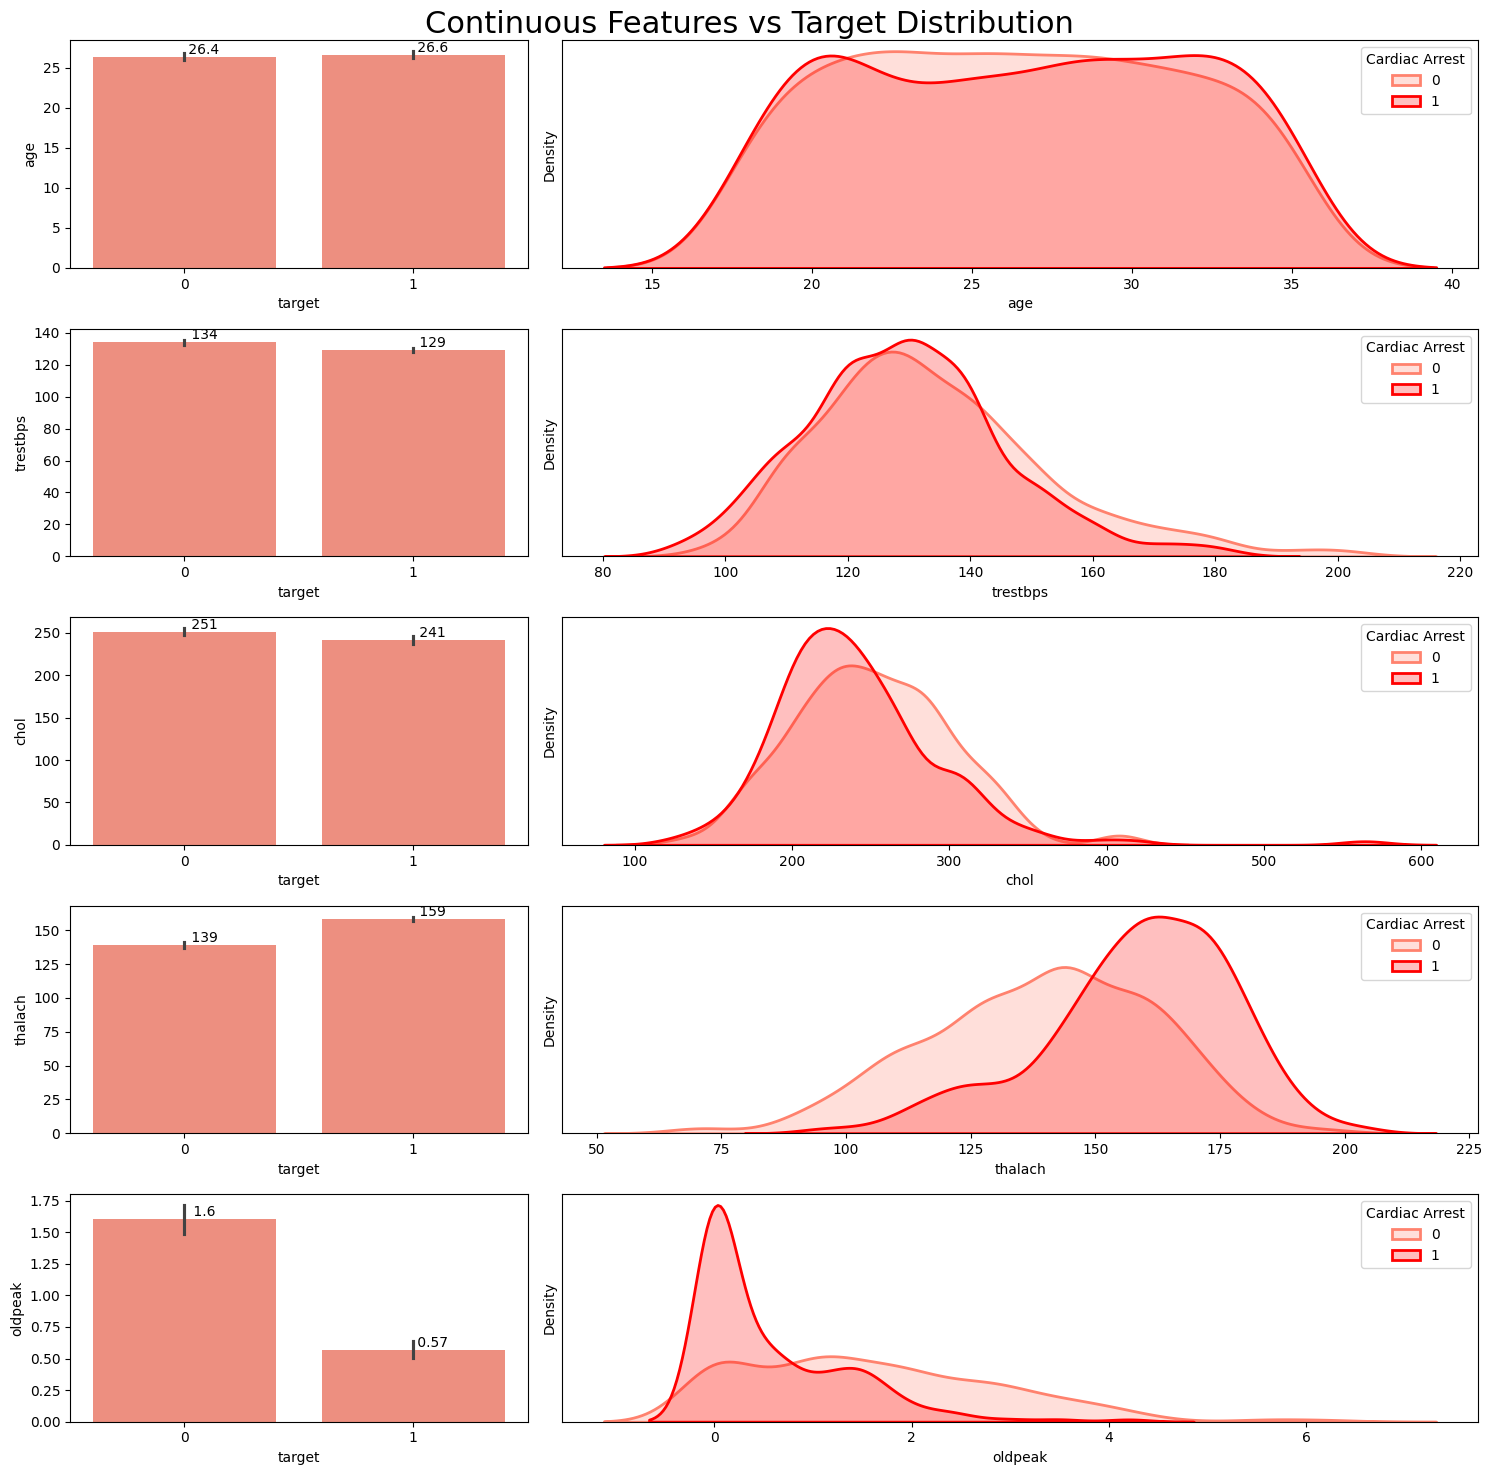

In [14]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=sca_df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=sca_df[sca_df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=sca_df[sca_df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Cardiac Arrest', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

### Step 4.2.2: Categorical Features vs Target

In [15]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

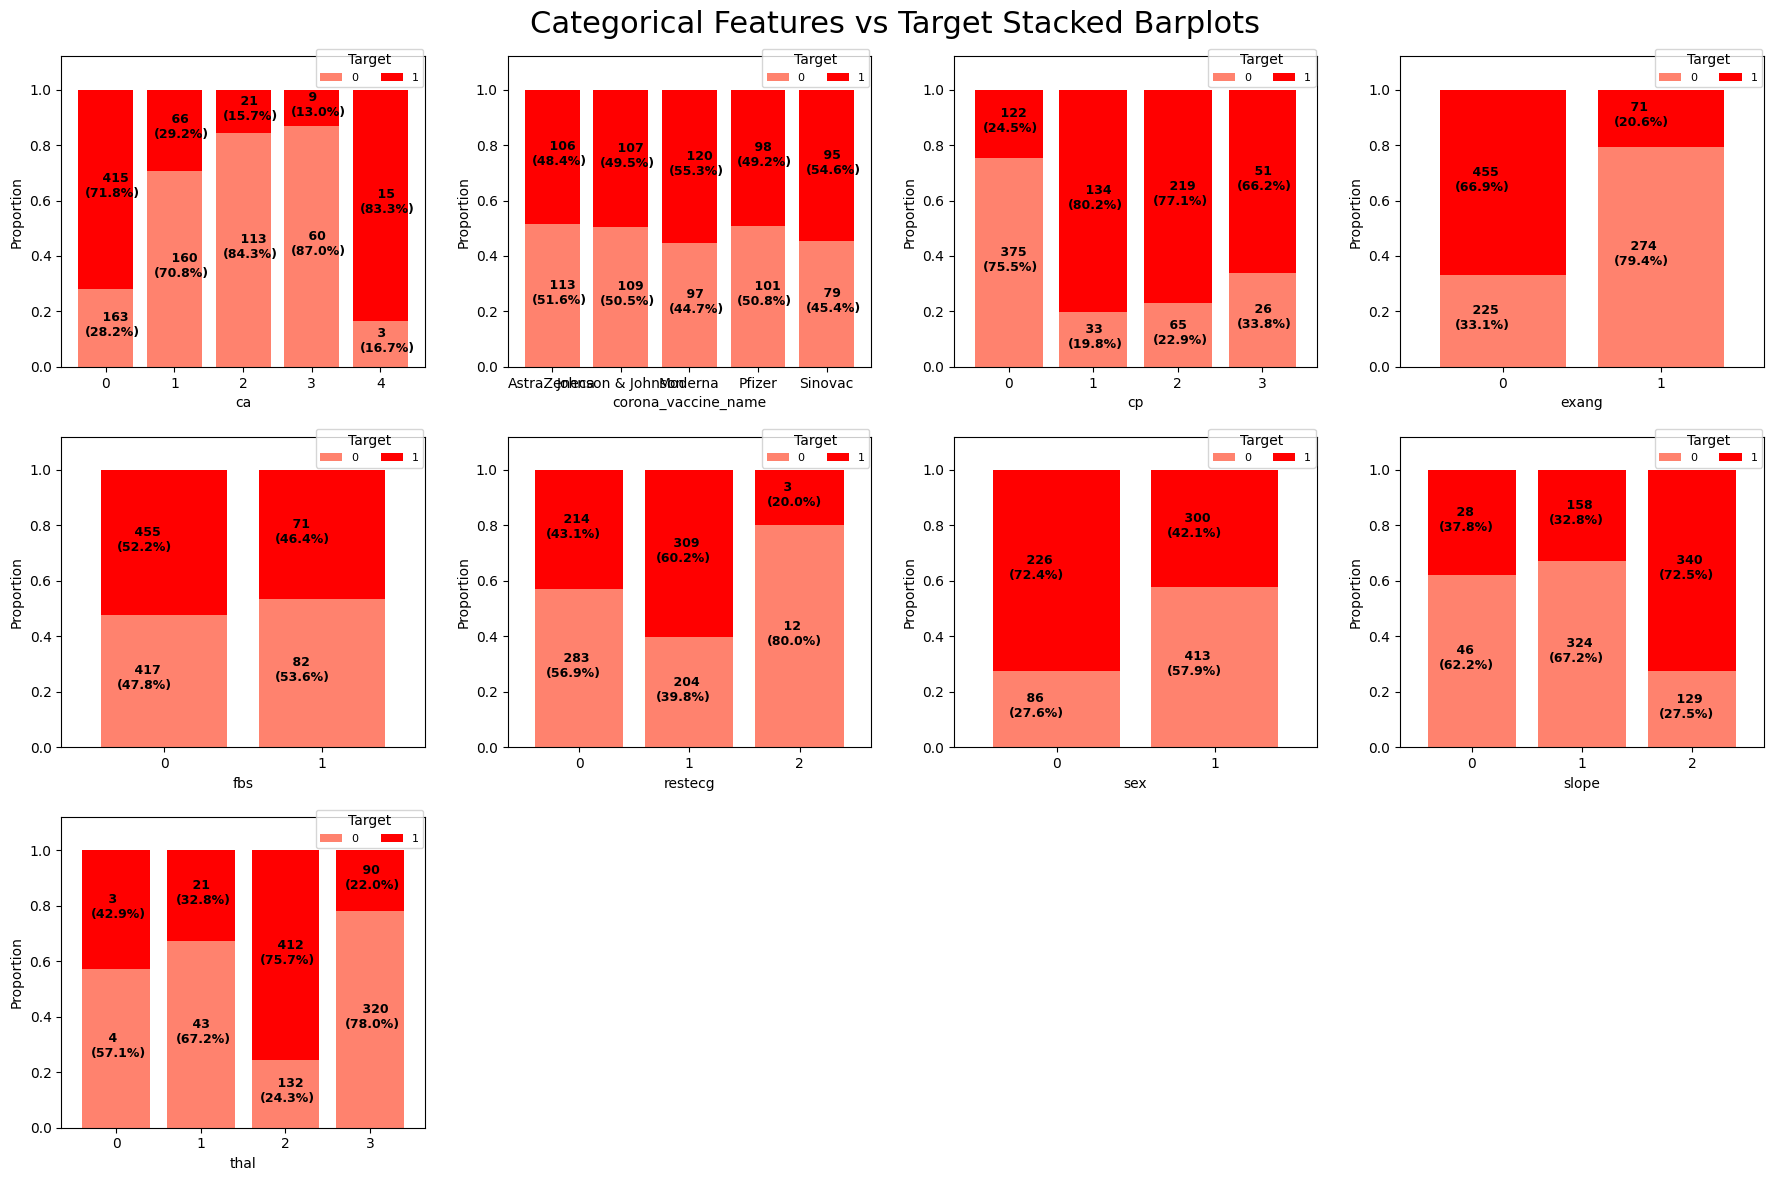

In [16]:
import math
from matplotlib.colors import ListedColormap

# Remove target column from the categorical features
categorical_features = [feature for feature in categorical_features if feature != 'target']

# Dynamically calculate rows and columns
n_features = len(categorical_features)
ncols = 4
nrows = math.ceil(n_features / ncols)

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
ax = np.array(ax).reshape(nrows, ncols)

# Loop through features
for i, col in enumerate(categorical_features):
    x, y = i // ncols, i % ncols

    cross_tab = pd.crosstab(index=sca_df[col], columns=sca_df['target'])
    cross_tab_prop = pd.crosstab(index=sca_df[col], columns=sca_df['target'], normalize='index')

    cmp = ListedColormap(['#ff826e', 'red'])

    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8,
                        colormap=cmp, legend=False, ylabel='Proportion')

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],
                                                   cross_tab.loc[val],
                                                   cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                          color="black", fontsize=9, fontweight="bold")

    ax[x, y].legend(title='Target', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Turn off unused axes
for i in range(n_features, nrows * ncols):
    row, col = i // ncols, i % ncols
    ax[row, col].axis('off')

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()
